## Q1
Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a
random kernel of size (3,3) using torch.nn.functional.conv2d

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [17]:
image = torch.rand(6, 6)
print("\nimage: ", image)

image = image.unsqueeze(dim=0)
print("\nimage.shape: ", image.shape)

image = image.unsqueeze(dim=0)
print("\nimage.shape: ", image.shape)

print("\nimage: ", image)

kernel = torch.ones(3, 3)
print("\nkernel: ", kernel)
print("\nkernel.shape: ", kernel.shape)

kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

print("\nkernel.shape: ", kernel.shape)

outimage = F.conv2d(image, kernel, stride=1, padding=0)

print("\noutimage: ", outimage)
print("\noutimage size: ", outimage.shape)

# Total Parameters=(Kernel Height×Kernel Width×Input Channels+Bias)×Output Channels
print("\nTotal Parameters: ", kernel.numel())
# print("\nManual Calculation: ", (kernel.shape[2]*kernel.shape[3]*1+1)*1)


image:  tensor([[0.7153, 0.5978, 0.1023, 0.7971, 0.9371, 0.7480],
        [0.5928, 0.9516, 0.5580, 0.4090, 0.0215, 0.9482],
        [0.9179, 0.4365, 0.3569, 0.2445, 0.0765, 0.5090],
        [0.3606, 0.2720, 0.1645, 0.0561, 0.3272, 0.6862],
        [0.8262, 0.1936, 0.4522, 0.5831, 0.2632, 0.4022],
        [0.9385, 0.9978, 0.3289, 0.7034, 0.9549, 0.8515]])

image.shape:  torch.Size([1, 6, 6])

image.shape:  torch.Size([1, 1, 6, 6])

image:  tensor([[[[0.7153, 0.5978, 0.1023, 0.7971, 0.9371, 0.7480],
          [0.5928, 0.9516, 0.5580, 0.4090, 0.0215, 0.9482],
          [0.9179, 0.4365, 0.3569, 0.2445, 0.0765, 0.5090],
          [0.3606, 0.2720, 0.1645, 0.0561, 0.3272, 0.6862],
          [0.8262, 0.1936, 0.4522, 0.5831, 0.2632, 0.4022],
          [0.9385, 0.9978, 0.3289, 0.7034, 0.9549, 0.8515]]]])

kernel:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

kernel.shape:  torch.Size([3, 3])

kernel.shape:  torch.Size([1, 1, 3, 3])

outimage:  tensor([[[[5.2291, 4.4537, 3

## Q2
Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D
to get the same output. You may ignore bias.

In [3]:
conv_layer = torch.nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, bias=False)

kernel = torch.rand(3, 1, 3, 3)
conv_layer.weight.data = kernel

output_conv2d = conv_layer(image)

output_conv2d_func = F.conv2d(image, kernel)

print("Output from nn.Conv2d:")
print(output_conv2d)

print("\nOutput from F.conv2d:")
print(output_conv2d_func)

Output from nn.Conv2d:
tensor([[[[2.5666, 1.5920, 1.7771, 1.3455],
          [2.3222, 2.0062, 1.9390, 1.6096],
          [2.0053, 2.2587, 1.9507, 2.1426],
          [1.6612, 1.8696, 2.6169, 2.5216]],

         [[2.5428, 1.4745, 2.1105, 2.0016],
          [2.4693, 1.9355, 2.1154, 1.3997],
          [2.5959, 2.1846, 1.7784, 1.7417],
          [1.9860, 2.2125, 2.5164, 2.5177]],

         [[1.9543, 1.3077, 1.7802, 1.1130],
          [1.7303, 1.8347, 1.6263, 0.9872],
          [2.1386, 1.9078, 1.6332, 1.3700],
          [1.2792, 1.8088, 1.9839, 2.0768]]]], grad_fn=<ConvolutionBackward0>)

Output from F.conv2d:
tensor([[[[2.5666, 1.5920, 1.7771, 1.3455],
          [2.3222, 2.0062, 1.9390, 1.6096],
          [2.0053, 2.2587, 1.9507, 2.1426],
          [1.6612, 1.8696, 2.6169, 2.5216]],

         [[2.5428, 1.4745, 2.1105, 2.0016],
          [2.4693, 1.9355, 2.1154, 1.3997],
          [2.5959, 2.1846, 1.7784, 1.7417],
          [1.9860, 2.2125, 2.5164, 2.5177]],

         [[1.9543, 1.3077, 1.78

## Q3
Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.

Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward
network on numerical data as outlined below.

Define model architecture

Load dataset from disk

Loop over epochs and batches

Make predictions and compute loss

Properly zero our gradient, perform backpropagation, and update model parameters

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(128, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/5], Loss: 0.2511
Epoch [2/5], Loss: 0.0743
Epoch [3/5], Loss: 0.0519
Epoch [4/5], Loss: 0.0416
Epoch [5/5], Loss: 0.0336


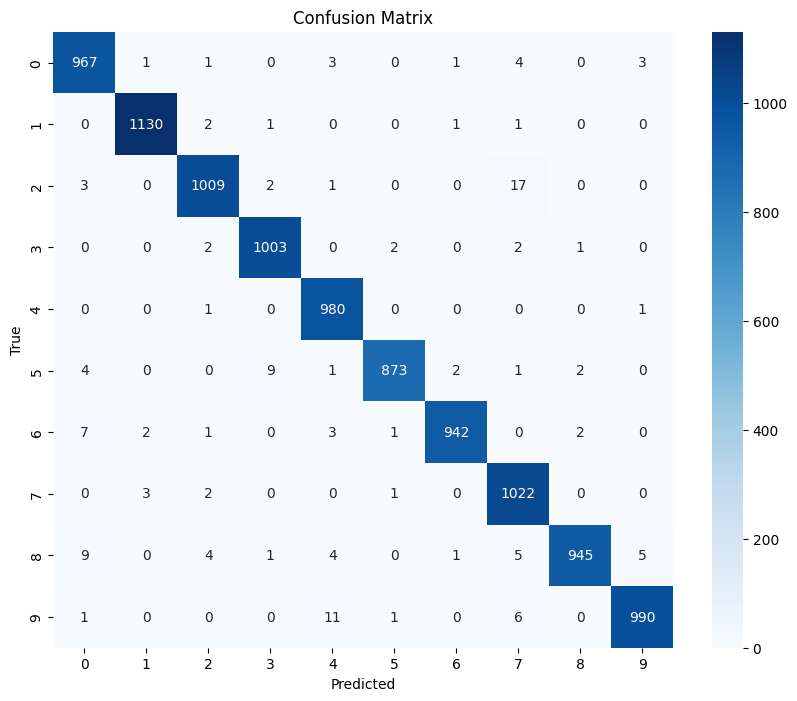

Number of learnable parameters: 149798


In [9]:
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(preds.numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of learnable parameters: {count_parameters(model)}')

## Q4
Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of
percentage drop in parameters vs accuracy.

In [10]:
class CNNModified(nn.Module):
    def __init__(self):
        super(CNNModified, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(
            nn.Linear(32, 10, bias=True),
            nn.ReLU(),
            nn.Linear(10, 10, bias=True)
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))


In [11]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [12]:
model = CNNModified()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/5], Loss: 0.4626
Epoch [2/5], Loss: 0.1258
Epoch [3/5], Loss: 0.0885
Epoch [4/5], Loss: 0.0710
Epoch [5/5], Loss: 0.0592


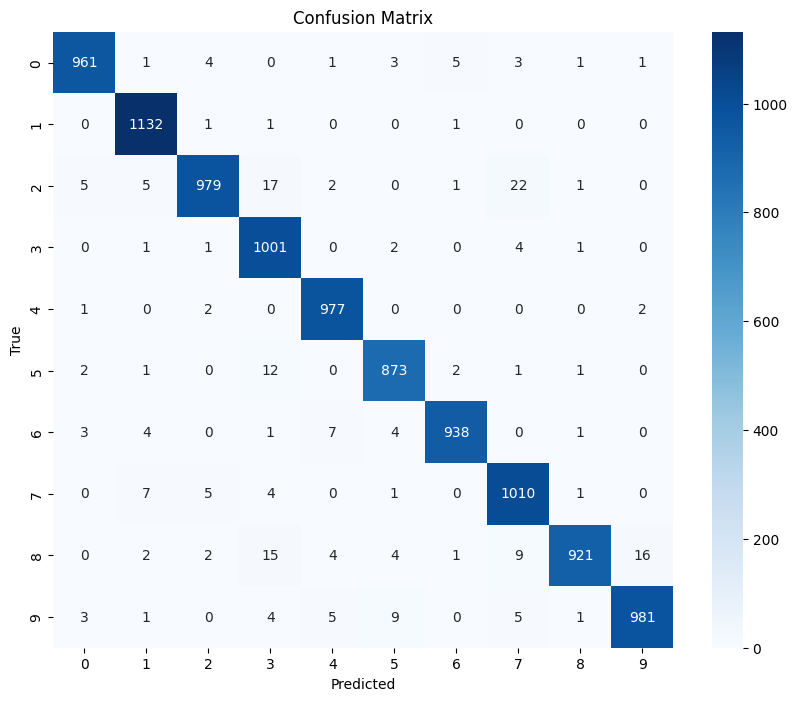

Number of learnable parameters: 37720


In [14]:
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(preds.numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of learnable parameters: {count_parameters(model)}')